# 1. Principal Component Analysis
    a. Apply PCA on CC dataset.
    b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score
       has improved or not?
    c. Perform Scaling+PCA+K-Means and report performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [3]:
cc_in=pd.read_csv('Data/CC.csv')
cc_in.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
X_data = cc_in.iloc[:,1:]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_data)
X_data = imp.transform(X_data)
X_data= pd.DataFrame(X_data)

In [10]:
pca_obj = PCA(2)
x_pca = pca_obj.fit_transform(X_data)
df = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df, X.iloc[:,-1]], axis=1)
finaldf.head()

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0


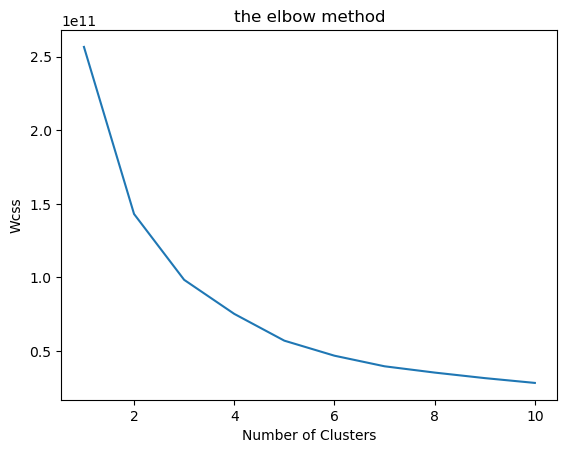

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [14]:
nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

KMeans(n_clusters=4)

In [15]:
y_cluster_kmeans = km.predict(finaldf)

score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print(score)

0.5025498896957256


In [16]:
X_data = cc_in.iloc[:,1:]


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_data)
  
X_data = imp.transform(X_data)


X_data=pd.DataFrame(X_data)

In [17]:
scaler = StandardScaler()
scaler.fit(X)

x_scaler = scaler.transform(X)



pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_in[['TENURE']]],axis=1)
print(finaldf)

             0         1  TENURE
0    -1.682218 -1.076450      12
1    -1.138287  2.506483      12
2     0.969678 -0.383528      12
3    -0.873622  0.043169      12
4    -1.599434 -0.688582      12
...        ...       ...     ...
8945 -0.359631 -2.016148       6
8946 -0.564369 -1.639125       6
8947 -0.926205 -1.810788       6
8948 -2.336553 -0.657966       6
8949 -0.556427 -0.400468       6

[8950 rows x 3 columns]


In [43]:
import warnings
warnings.filterwarnings("ignore")

nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

KMeans(n_clusters=4)

In [44]:
import warnings
warnings.filterwarnings("ignore")

y_cluster_kmeans = km.predict(finaldf)

score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print(score)

0.4378874637006994


# 2. Use pd_speech_features.csv
    a. Perform Scaling
    b. Apply PCA (k=3)
    c. Use SVM to report performance

In [32]:
speech_in=pd.read_csv('Data/pd_speech_features.csv')
speech_in.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [33]:
x =speech_in.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_in2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_in2,speech_in[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052430  1.476820  -6.828358      1
1   -10.641065  1.590407  -6.811683      1
2   -13.520081 -1.243922  -6.794534      1
3    -9.142525  8.848870  15.300271      1
4    -6.758090  4.624220  15.645662      1
..         ...       ...        ...    ...
751  22.377450  6.470191   1.439461      0
752  13.503270  1.450493   9.344881      0
753   8.328507  2.392511  -0.911252      0
754   4.074595  5.417626  -0.847074      0
755   4.052810  6.076463  -2.022295      0

[756 rows x 4 columns]


In [34]:

svc_obj = SVC(kernel='linear') 


x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


svc_obj.fit(X_train, y_train)


y_pred=svc_obj.predict(X_test)


accuracy_score(y_test, y_pred)


print("svm accuracy =", accuracy_score(y_test, y_pred))

svm accuracy = 0.768


In [35]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



# 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2

In [37]:
iris_in = pd.read_csv("Data/iris.csv")

iris_in.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
stdsc_obj = StandardScaler()
X_train_std = stdsc_obj.fit_transform(iris_in.iloc[:,:-1].values)

In [39]:
class_le = LabelEncoder()
y = class_le.fit_transform(iris_in['Species'].values)

In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

In [41]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,10.036763,-0.451330,0
1,9.172930,-1.477234,0
2,9.480989,-0.979693,0
3,8.818119,-1.408602,0
4,9.960200,-0.112546,0


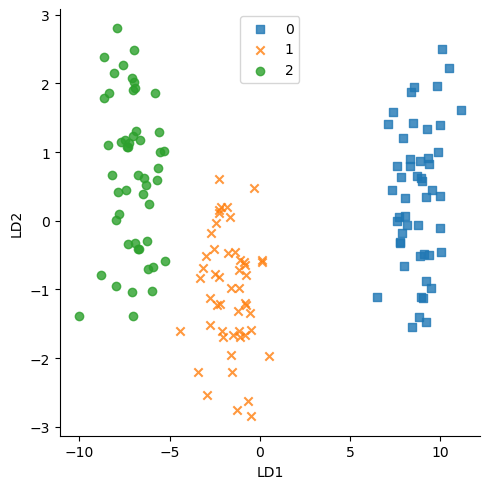

In [48]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

# 4. Briefly identify the difference between PCA and LDA

Both LDA and PCA rely on linear transformations and aim to maximize the variance in a lower dimension. PCA is an unsupervised learning algorithm while LDA is a supervised learning algorithm. This means that PCA finds directions of maximum variance regardless of class labels while LDA finds directions of maximum class separability'
